# 다변수 함수의 기울기 

$x_{0}$ 와 $x_{1}$의 편미분을 동시에 계산하고 싶다면? <br/>
모든 변수의 편미분 ($\frac{\partial f}{\partial x_{0}}$,$\frac{\partial f}{\partial x_{1}}$)을 **벡터**로 정리한다. <br/>

따라서, <br/>다변수 함수의 기울기(gradient) = $[\frac{\partial f}{\partial x_{0}}  \frac{\partial f}{\partial x_{1}} ]^{T} $ 

![다변수 함수의 기울기](./image/fig_7.PNG)
[https://www.youtube.com/watch?v=DeP2OT7nCa0]

In [1]:
import numpy as np 
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d    # 3D plotting

In [2]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4                              # 0.0001 조낸 작은수 예시 
    grad = np.zeros_like(x)               # x와 shape이 같은 zero-배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
                                         # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
                                      # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val             # 값 복원
        
    return grad

In [3]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

### 접선

In [4]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

### 2변수 함수 정의 

In [5]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)              # f(x0, x1) = x0**2 + x1**2  

    else:
        return np.sum(x**2, axis=1)

### 정의역(domain)

In [6]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

In [7]:
test = np.zeros_like(x0)
print(test)
print(test.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(18,)


In [8]:
X_flat = X.flatten()         #평활화 
Y_flat = Y.flatten()

# 기울기 구하기 

In [9]:
numerical_gradient(function_2, np.array([3.0, 4.0]) )

array([6., 8.])

In [10]:
numerical_gradient(function_2, np.array([0.0, 2.0]) )

array([0., 4.])

In [22]:
numerical_gradient(function_2, np.array([1.0, -1.5]) )

array([ 2., -3.])

In [12]:
grad = numerical_gradient(function_2, np.array([X_flat, Y_flat]) )

In [13]:
np.array([X_flat, Y_flat]).shape

(2, 324)

No handles with labels found to put in legend.


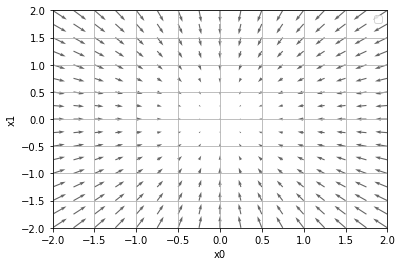

In [14]:
plt.figure()
plt.quiver(X_flat, Y_flat, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

## 기울기의 의미 

위의 그림처럼 방향을 가진 벡터(화살표)로 그려짐. <br/>
언뜻 기울기는 함수의 **'가장 낮은 장소(최솟값)'**를 가리키는 것 같다. 하지만 엄밀하게 말해서 아니다. <br/>

<span style="color: blue">사실 기울기는 **각 지점에서** 낮아지는 방향을 가리킨다. </span> <br/>
[기울기가 가리키는 쪽은 각 장소에서 **함수의 출력 값을 가장 크게 줄이는 방향**]  

gradient decent 기법의 원리이니까 기억하자  

### 3차원 그래프 

In [15]:
%matplotlib notebook
Z = X **2 + Y**2

<IPython.core.display.Javascript object>


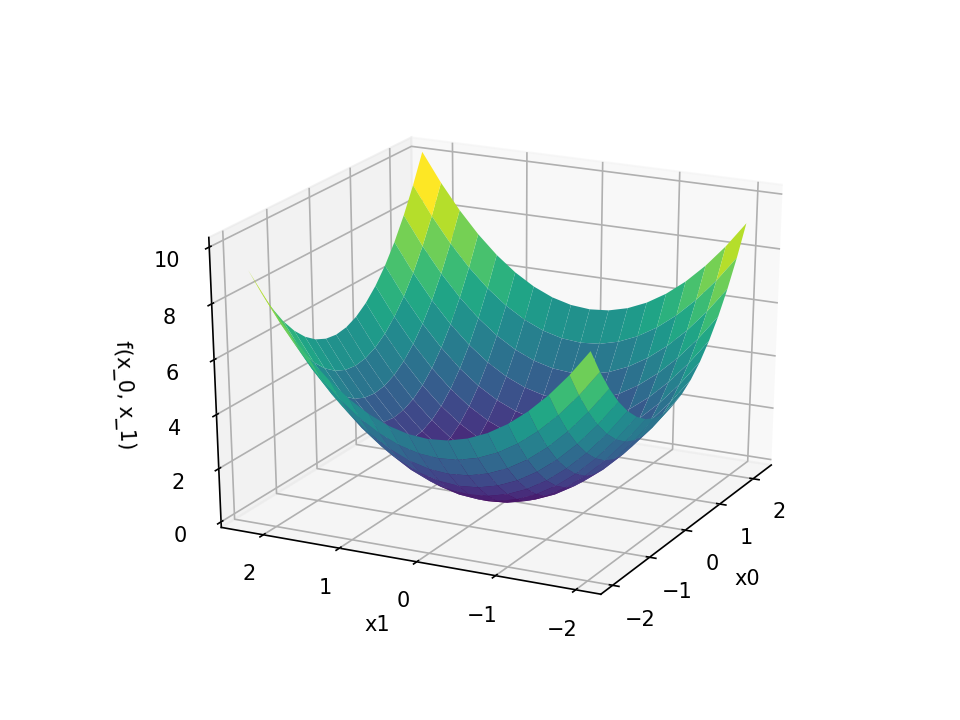

Text(0.5, 0, 'f(x_0, x_1)')

In [16]:
fig  =  plt.figure()
ax   = plt.axes( projection = '3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x_0, x_1)")

#### TEST

In [17]:
t0 = np.arange(-2, 2, 0.5)
t1 = np.arange(-2, 2, 0.5)
print(t0)
print(t1)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]


In [18]:
T1, T2 = np.meshgrid(t0, t1)

In [19]:
print(T1)
print(T1.shape)

[[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]]
(8, 8)


In [20]:
print(T2)
print(T2.shape)

[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]]
(8, 8)


In [21]:
print(T1.flatten())           # 평활화 
print(T1.flatten().shape) 

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5 -2.  -1.5 -1.  -0.5
  0.   0.5  1.   1.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5 -2.  -1.5
 -1.  -0.5  0.   0.5  1.   1.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
(64,)
